Luis Baez, Kirsten Pastore, Izzy Hurley

## <center>CS341 Project 1 (due Thursday September, 22, 2022)</center>

## Part 1. Units and Degradation

To model the degradation of protein $P1$, we use the following ODE 

(∗) $\frac{d}{dt}P1(t) = -d1\cdot P1(t)$
 
where $P1$ has units of nM and $t$ has units of seconds (s).

<hr style="border:2px solid gray"> </hr>

(1) What units must d1 have? Show your work.



$\frac{d}{dt}P1(t) = -d1\cdot P1(t)$

$\frac{d}{dt}P1(t) = \frac{dP1}{dt}$

$\frac{(dP1)nM}{(dt) s}$

nM/s



<hr style="border:2px solid gray"> </hr>

This is a linear differential equation, which has an analytic solution 

(†) $P1(t) = e^{-d1\cdot t}\cdot P1_0$

where the initial condition is $P1(0) = P1_0$.

We can confirm that it is a solution by differentiating both sides of (†):

$\frac{d}{dt}(P1(t)) = \frac{d}{dt}(e^{-d1\cdot t}\cdot P1_0) $

And since the $e^t$ is isn't own derivative, we have

$\frac{d}{dt}(P1(t)) = -d1\cdot e^{-d1\cdot t}\cdot P1_0 $

and substituting the definition of $P1(t)$

$\frac{d}{dt}(P1(t)) = -d1\cdot P1(t)$

(2) Using initial condition $P1(0) = 2 nM$ and kinetic parameter $d1=2 s^{-1}$, simulate the system from time $t=0s$ to $t=10$s with a time step of $0.01$s. (Use sciyp.integrate.solve_ivp.)

Plot the simulation result along with the analytic result on the same graph. Be sure to label your axes and to supply a legend. (use matplotlib.pyplot's plot command).

Next, demonstrate that the slope of the solution really is $-d1 P1(t)$ by selecting several points on the solution curve and drawing a short line with slope $-d1 P1(t)$ centered at $P1(t)$. We expect these lines to be tangent lines, if the solution is correct.

Finally, add a new Markdown cell to act as a caption for the figure. It should describe the content of the figure (i.e. it should include that one line is the numerical solution to a simulation, one is the analytic solution, and that there are short lines computed using the RHS of the ODE). It should also explain any conclusions we should draw from this figure. In this case, explain why these short lines demonstrate the curve is the solution.

In [ ]:
import numpy as np
import scipy.integrate


In [ ]:
def deg_model(t, y, param): 
    d1 = params[0]
    ddt = -d1 * y
    return ddt
    
params = [2] # d1 = 2 1/s
deg = lambda t,y: deg_model(t,y,params)
sol = scipy.integrate.solve_ivp( fun=deg, t_span=(0,10), y0=(2,), 
                                 t_eval=np.arange(0,10,.01) )
print(sol.y.shape)

#Helper function for tangent lines
def point_slope_to_seg(slope, point,leg):
    y = lambda x, point : slope*(x-point[0]) +  point[1]
    right = point[0]+leg
    left = point[0]-leg

    pt1 = (right, y(right, point))
    pt2 = (left, y(left, point))
    
    return (pt1,pt2)



(1, 1000)


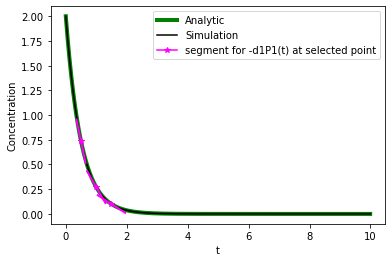

In [ ]:
# Analytic Solution and Simulation Solution Graph 
import matplotlib.pyplot as plt
d1 = 2
P1_0 = 2
analytic_ddt = np.exp(-d1*sol.t)* P1_0


plt.plot(sol.t, analytic_ddt, linewidth = 4, color = 'green')
plt.plot( sol.t, sol.y.T, linewidth = 1.5, color = 'black' ) # linewidth for visualization
plt.xlabel("t")
plt.ylabel("Concentration")

#Demonstrate Slope of the Solution 
velo = np.divide(np.diff(analytic_ddt),np.diff(sol.t)).T # FIX THIS!!!!

# lines created using −𝑑1𝑃1(𝑡) 
for i in range(1,4):
    time = i*.5
    time_idx = (int)(time * 100)
    x = sol.y.T[time_idx][0]
    slope = velo[time_idx]


    segment = point_slope_to_seg(slope,(time,x),.15*i)
    plt.plot(time,x, marker = '*', color = 'magenta')
    x_values = [segment[0][0],segment[1][0]]
    y_values = [segment[0][1],segment[1][1]]
    plt.plot(x_values,y_values, color = "magenta", linewidth = 2);
    
    
plt.legend(["Analytic", "Simulation", "segment for -d1P1(t) at selected point"]);



Figure 1: Plot of the degredation of Protien P1. Concentration in nM measured over a 10 second time period. Analytic results from and Simulation results from ODE solving for P1 are individually plotted. These methodologies for the initial conditions of P1_0 = 2 nM and d1 = 2  $d1=2 s^{-1}$ depicted appear to be nearly identical.The line segments depict the slope of the curve calculated using the RHS of the ODE equations at the point denoted by the star marker. Each of these lines is tangential to the curve at this point. This tangential relationship proves that the simulated model matches the actual rates of degretory changes determined by the chemical properties of P1 and thus validates this modeling approach. 


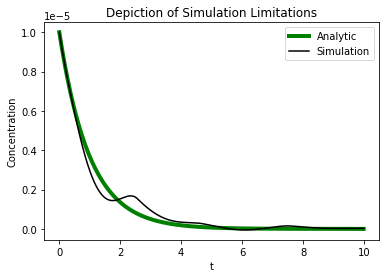

In [ ]:
# Expansion Work (tiny initial concentration )

d1 = 1
P1_0 = .00001
analytic_ddt = np.exp(-d1*sol.t)* P1_0
params = [d1] # d1 = 2 1/s
deg = lambda t,y: deg_model(t,y,params)
exsol = scipy.integrate.solve_ivp( fun=deg, t_span=(0,10), y0=(P1_0,), 
                                 t_eval=np.arange(0,10,.01) )


plt.plot(exsol.t, analytic_ddt, linewidth = 4, color = 'green')
plt.plot( exsol.t, exsol.y.T, linewidth = 1.5, color = 'black')
plt.xlabel("t")
plt.ylabel("Concentration")



plt.legend(["Analytic", "Simulation"]);
plt.title("Depiction of Simulation Limitations");

Figure 2:  Plot of the degredation of Protien P1. Concentration in nM measured over a 10 second time period. Analytic results from and Simulation results from ODE solving for P1 are individually plotted. These methodologies for the initial conditions of P1_0 = .00001 nM and $d1=1 s^{-1}$ depicted do not appear identical as they do in cases with more substantiative concentrations. The simulation depicts a weird oscilation like pattern after the concentration drops below 0.2. The depicted increaces in concentration in the simulation line are not backed by the chemically informed mathematics of the system. Instead these changes show the limitations of the ODE initial value problem solving over this span with such small values. 


<hr style="border:2px solid gray"> </hr>

(3) The half-life of a protein is the amount of time it takes for the concentration
to halve. What is the half-life of protein P1 (in terms of d1)? Show your work.

 $P1(t) = e^{-d1\cdot t}\cdot P1_0$
 
 
 $\frac{1}{2}*2$  nM = $ e^{-d1\cdot t}\cdot 2 $ nM
 
 $1$  nM = $ e^{-2\cdot t}\cdot 2 $ nM
 
 $\frac{1}{2}$  nM = $ e^{-2\cdot t} $ 
 
$\ln(\frac{1}{2})$ = $ \ln(e^{-2\cdot t}) $
  
$\ln(\frac{1}{2})$ = $ -2\cdot t $

$\frac{\ln(\frac{1}{2})}{-2}$ = $ t $


$t = 0.34657359028$

<hr style="border:2px solid gray"> </hr>

(4) Demonstrate that your calculation of the half-life is correct by re-plotting the numerical solution from above and plotting a vertical line at the half-life and a horizontal line at $P1(0)/2$. Add a new Markdown cell below the figure to describe what it contains and why it shows your calculation is correct.

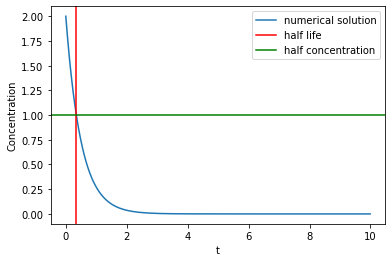

In [ ]:
# Half-life Proof 
import matplotlib.pyplot as plt
d1 = 2
P1_0 = 2

plt.plot( sol.t, sol.y.T) #is this numerical 
plt.xlabel("t")
plt.ylabel("Concentration")

plt.axvline(x = 0.34657359028, color = 'r');
plt.axhline(y = (P1_0/2), color = 'g');
plt.legend(['numerical solution','half life','half concentration']);

The caculation for half life  $P1(t) = e^{-d1\cdot t}\cdot P1_0$  yielded that the concentration for the half life of protien P1 is 0.34657359028 s. With a initial concentration of 2 nM for P1 the half-life of the protien will be reached by definition when this concentration is halved and thus equal to 1 nM. The vertical line corresponding to this molar concentration of 1 nM and a horizontal line the calculated half life of 0.34657359028 seconds intersect with eachother and with the numerical solution at the same point. This intersection proves that this half life calculation is correct because the half life concentration of the model is reached at the half life calculated for the model. If this intersection did not occur on the numerical solution curve it would indicated that the half life concentration does not "occur" at the calulated time. 


## Part 2. Dimerization

Consider a system in which two proteins can bind to form a dimer, and unbind to
unform the dimer.

![dimerNetwork.png](attachment:dimerNetwork.png)

Proteins P1 and P2 can bind to form a dimer and the dimer can unbind to release P1 and P2. In addtion, P1, P2, and the dimer are degraded.

For each process (indicated by the white square), we write the corresponding reaction. Since we are using mass action kinetics, we know that the mathematical expression for each reaction is dependent on the substrates and a kinetic rate constant. To be as informative as possible, we include in our reactions the kinetic rate constant associated with each reaction, i.e. 

![dimerizationChemicalReaction.png](attachment:dimerizationChemicalReaction.png)

where $k1$ is the rate constant for binding and $k2$ is the rate constant for unbinding.


<hr style="border:2px solid gray"> </hr>

(1) Write down the set of ODEs that describe the dynamics of this system.

dP1/dt = -k1*P1*P2 + k2*P1P2

dP2/dt = -k1*P1*P2 + k2*P1P2

dP1P2/dt = -k2*P1P2 + k1*P1*P2

<hr style="border:2px solid gray"> </hr>

(2) Using initial conditions $P1(0) = 2 nM$, $P2(0) = 3 nM$, and $P1P2(0) = 1 nM$ and kinetic parameters $k1= 1nM^{-1}s^{-1}$ and $k2=2 s^{-1}$, simulate the system from time $t=0s$ to $t=10s$ with a time step of $0.01s$.

Plot the results, being sure to label your axes and to supply a legend. Add a new Markdown cell below the figure to describe what it contains and why the basic trajectories of the curves makes sense, given the ODEs.

In [ ]:
def dimer_model(t, y, params): 
    
    k1 = params[0] 
    k2 = params[1]
    
    P1 = y[0]
    P2 = y[1] 
    P1P2 = y[2] 
    
    dydt = np.zeros( (3,) )
    dydt[0] = -k1*P1*P2 + k2*P1P2
    dydt[1] = -k1*P1*P2 + k2*P1P2
    dydt[2] = -k2*P1P2 + k1*P1*P2
    
    return dydt

In [ ]:
#rate constants 
k1 = 1
k2 = 2
params = (k1, k2)

#initial concentrations (P1, P2, P1P2)
P1 = 2
P2 = 3
P1P2 = 1 
yinit = (P1, P2, P1P2)
dm = lambda t,y: dimer_model(t, y, params)
sol = scipy.integrate.solve_ivp(fun = dm, t_span = (0,10), y0 = yinit, t_eval = np.arange(0,10,.1))

Plot simulation over time 

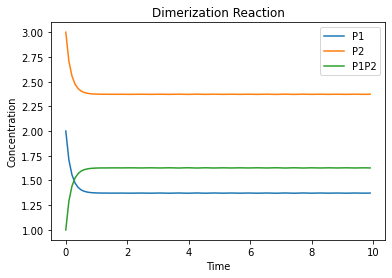

In [ ]:
plt.plot( sol.t, sol.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1", "P2", "P1P2"])
plt.title( "Dimerization Reaction")

plt.show() 

The starting concentrations are reflected in the plot. P2 starts at a concentration of 3nM, 
P1 starts at a concentration of 2 nM, and P1P2 starts at a concentration of 1 nM. The backward
reaction is faster than the forward reaction, as k1 = 1 nM/s and k2 = 2 nM/s. The concentration of P1P2 is initially small, and despite the backward reaction being faster than the forward reaction, the magnitude of (k1* P1* P2) is greater than (-k2* P1P2). The concentrations of P1 and P2 are initially declining because the magnitude of (-k1* P1* P2) is greater than the magnitude of (k2* P1P2). For all proteins, the initial rate of change is larger, and this is reflected in a steeper curve. The rate of change levels to zero, as seen when the curve is flat for all three proteins. This occurs when (k1* P1 * P2) = (k2 * P1P2). 

<hr style="border:2px solid gray"> </hr>

(3) Steady-state is achieved when the rates are at zero. What is the steady-state for this system? Explain the relationships between the steady-states of $P1$, $P2$, and $P1P2$. Why are they in such a relationship? (i.e. relate the parameters to the steady-states)

In [ ]:
#expansion work 
#function that finds when the change in concentration for all variables is less than a indicated threshold
def find_eq(sol, threshold): 
  diff_arr = np.argwhere(abs(np.diff(sol.y)) < threshold)  #finds the arguements where the difference between array elements is less than the threshold
  comp_arr = np.zeros( (len(sol.y)) ) #init an array which will store the time step where each variable meets this threshold

  for x in range(len(sol.y)):
    temp_arr = diff_arr[np.argwhere(diff_arr[:,0] == x),1] #creates a temp array of time steps condition is met
    comp_arr[x] = np.min(temp_arr) #adds the minimum time step when the condition is met for each variable 

  if(np.all(comp_arr == comp_arr[0])):
    return sol.t[int(comp_arr[0])] #if the time step is the same for each variable return that time step 
  else: 
    return sol.t[int(comp_arr.mean)]
 

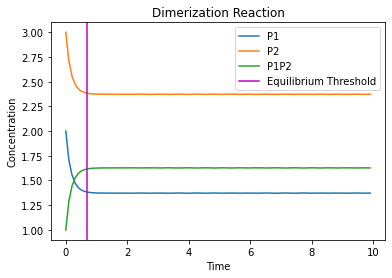

In [ ]:
plt.plot( sol.t, sol.y.T )
plt.axvline(find_eq(sol, .005), color = 'm')
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1", "P2", "P1P2", "Equilibrium Threshold"])
plt.title( "Dimerization Reaction")

plt.show() 

This graph is a visualization of the dimerization reaction given the initial set of conditions. The graph reaches steady state after the threshold, where the change in each of the dy/dt is less than the indicated value 

<hr style="border:2px solid gray"> </hr>

(4) Re-run the simulation with $k1=1nM^{-1}s^{-1}$ and $k2=1s^{-1}$ and plot the results. Add a new Markdown cell below the figure to describe what it contains.

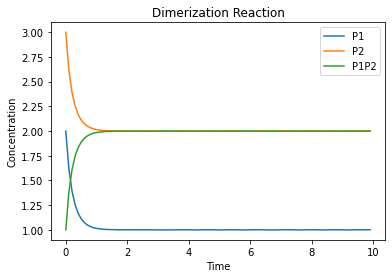

In [ ]:
#new rate constants (k1, k2)
k1 = 1 
k2 = 1
params = (k1, k2)

#initial concentrations (P1, P2, P1P2)
P1 = 2
P2 = 3
P1P2 = 1 
yinit = (P1, P2, P1P2)


dm2 = lambda t,y: dimer_model(t, y, params)
sol2 = scipy.integrate.solve_ivp(fun = dm2, t_span = (0,10), y0 = yinit, t_eval = np.arange(0,10,.1))

plt.plot( sol2.t, sol2.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1", "P2", "P1P2"])
plt.title( "Dimerization Reaction")

plt.show() 

The concentrations of P2 and P1P2 level out to the same value. The concentration of P1 goes to one. When k1 and k2 are equal, the forward and reverse reactions are occuring at the same rate. The concentrations of P1 and P2 decline because there is initially a larger concentration of P1 and P2. The P1P2 concentration increases because P1 and P2 form the P1P2 dimer. The curves level-out when (k1 * P1 * P2) = (k2 * P1P2). Since k1 and k2 are equal, this occurs when P1 * P2 = P1P2. Since the P1 levels out at P1 = 1, P2 and P1P2 level out at P2 = P1P2. 

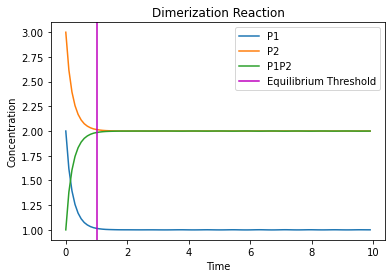

In [ ]:
plt.plot( sol2.t, sol2.y.T )
plt.axvline(find_eq(sol2, .005), color = 'm')
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1", "P2", "P1P2", "Equilibrium Threshold"])
plt.title( "Dimerization Reaction")

plt.show() 

Given the new set of rate constants, this visualizes where the system reaches steady-state given a threshold. 

<hr style="border:2px solid gray"> </hr>

(5) The rate constants for binding and unbinding are identical. But this does not mean that the system begins in steady-state. Why not?

A system in steady-state is a system where the variables which define the behavior of a system are unchanging over time. The system is not initially in steady-state because the concentration P1 * P2 does not equal P1P2. The initial concentration of P1 is 2, the initial concentration of P2 is 3, and the initial concentration of P1P2 is 1. For the system to be in steady state, dydt for each of the variables must equal zero, and the magnitude of (k1* P1* P2) must equal (k2* P1P2). 

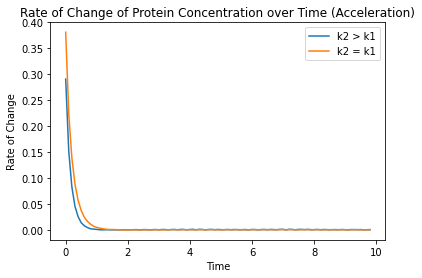

In [ ]:
#expansion work

plt.plot( sol.t[0:99], np.mean(abs(np.diff(sol.y)).T , axis = 1))
plt.plot( sol2.t[0:99], np.mean(abs(np.diff(sol2.y)).T , axis = 1))

plt.xlabel( "Time")
plt.ylabel( "Rate of Change" )
plt.legend( ["k2 > k1", "k2 = k1"])
plt.title( "Rate of Change of Protein Concentration over Time (Acceleration)")

plt.show()

given the set of initial concentrations where P1 = 2, P2 = 3, and P1P2 = 1, when K1 = K2, the rate of change of the rate of change (acceleration) is greater than when k2 > k1 because P1P2, which starts as smaller than P1 * P2 is not multiplied by as much to cancel out the magnitude of k1 * P1 * P2. When k2 > k1, the system also reaches equalibrium faster because the forward reaction is the same speed as the backward reaction, and when you start with a higher concentration of protein as the reactants, and the reverse dimer reaction is also fast, it will take longer for the rate of change to approach zero. 

<hr style="border:2px solid gray"> </hr>

(6) Explain what has changed in the relationship between the steady-states of the molecular concentrations. Why have those changes occurred?
 
*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible. You could demonstrate the calculation for extreme values of k1 and k2, produce annotated figures, and demonstrate the relationship between simulation output and calculations you perform.*

For steady state to occur, the dydt value for P1, P2, and P1P2 must all equal zero. For this system, this occurs when the magnitude of (k1* P1* P2) equals (k2* P1P2). In the initially described relationship, k1 is 1 and k2 is 2, so, the backward reaction is faster than the forward reaction. In the first set of conditions, P1 and P2 reach steady-state concentrations at a higher point than in the second set of conditions because the reverse reaction is separating the dimer at a faster rate. The steady-state concentration of P1P2 stays lower in the first set of conditions because of the larger k2.

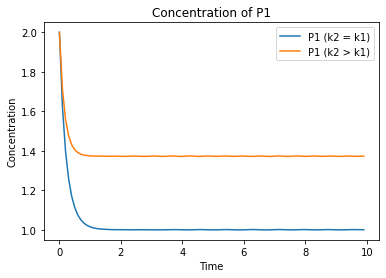

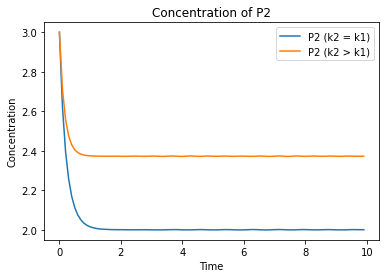

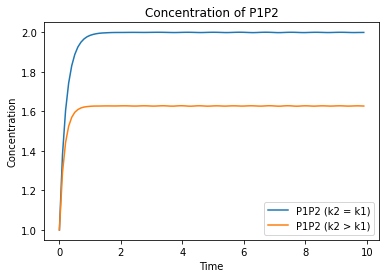

In [ ]:
#expansion work

plt.plot( sol2.t, sol2.y.T[:,0] )
plt.plot( sol.t, sol.y.T[:,0] )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1 (k2 = k1)", "P1 (k2 > k1)" ])
plt.title( "Concentration of P1")

plt.show()

plt.plot( sol2.t, sol2.y.T[:,1] )
plt.plot( sol.t, sol.y.T[:,1] )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P2 (k2 = k1)", "P2 (k2 > k1)" ])
plt.title( "Concentration of P2")

plt.show()

plt.plot( sol2.t, sol2.y.T[:,2] )
plt.plot( sol.t, sol.y.T[:,2] )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1P2 (k2 = k1)", "P1P2 (k2 > k1)" ])
plt.title( "Concentration of P1P2")

plt.show()

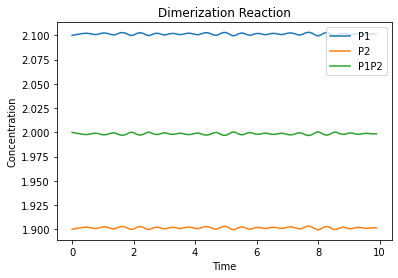

In [ ]:
#expansion work

#new rate constants (k1, k2)
k1 = 1
k2 = 2
params = (k1, k2)

#initial concentrations (P1, P2, P1P2)
P1 = 2.1
P2 = 1.9
P1P2 = 2 
yinit = (P1, P2, P1P2)

dm3 = lambda t,y: dimer_model(t, y, params)
sol3 = scipy.integrate.solve_ivp(fun = dm2, t_span = (0,10), y0 = yinit, t_eval = np.arange(0,10,.1))

plt.plot( sol3.t, sol3.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1", "P2", "P1P2"])
plt.title( "Dimerization Reaction")

plt.show() 

When the initial concentration of P1 is 2.1, the initial concentration of P2 is 1.9, and the initial concentration of P1P2 is 2 with k1 being 1 and k2 being 2, each of the lines remains near its initial concentration. The deviations from a straight line for each of the proteins are visible because of the smaller scale of the graph, and would not be visible if the intervals on the Y-axis were larger. Further, these occur because while the rate of change of each protein approaches zero, the system is still dynamic. 

These graphs show the difference in the change in concentration for each of the proteins given different k values, but with constant initial concentration.

# Part 3. Dimerization with Degradation

We add to our system the process of degradation.

![dimerNetworkWithDegrad.png](attachment:dimerNetworkWithDegrad.png)

Proteins P1 and P2 can bind to form a dimer and the dimer can unbind to release P1 and P2. In addtion, P1, P2, and the dimer are degraded.

For each process (indicated by the white square), we write the corresponding reaction (including rate constants), i.e. 

![dimerizationWithDegradationChemicalReaction.png](attachment:dimerizationWithDegradationChemicalReaction.png)

<hr style="border:2px solid gray"> </hr>

(1) Write down the set of ODEs that describe the dynamics of this system.


 dP1/dt = -k1(P1)(P2) + k2(P1P2) - d1(P1)

 dP2/dt = -k1(P1)(P2) + k2(P1P2) - d2(P2)

 dP1P2/dt = k1(P1)(P2) - k2(P1P2) - d3(P1P2)


<hr style="border:2px solid gray"> </hr>

(2) Using initial conditions $P1(0) = 2 nM$, $P2(0) = 3 nM$, and $P1P2(0) = 1 nM$ and kinetic parameters $k1= 1nM^{-1}s^{-1}$, $k2=2 s^{-1}$ and $d1=d2=d3=1 s^{-1}$, simulate the system from time $t=0s$ to $t=10s$ with a time step of $0.01s$.

Plot the results, being sure to label your axes and to supply a legend.

In [ ]:
# Write code here.
def dimer_deg_model(t, y, params ): 
    
    d1 = params[0]
    d2 = params[1]
    d3 = params[2]
    k1 = params[3] 
    k2 = params[4]
    
    P1 = y[0]
    P2 = y[1] 
    P1P2 = y[2] 
    
    dydt = np.zeros( (3,) )
    dydt[0] = -k1*P1*P2 + k2*P1P2 - d1*P1 
    dydt[1] = -k1*P1*P2 + k2*P1P2  - d2*P2 
    dydt[2] =  k1*P1*P2 - k2*P1P2  - d3*P1P2 
    
    return dydt

# constants 
d1 = 1
d2 = 1
d3 = 1
k1 = 1
k2 = 2
params = (d1, d2, d3, k1, k2)

P1 = 2
P2 = 3
P1P2 = 1 
yinit = (P1, P2, P1P2)

dm = lambda t,y: dimer_deg_model(t, y, params)
sol3 = scipy.integrate.solve_ivp(fun = dm, t_span = (0,10), y0 = yinit, t_eval = np.arange(0,10,.1))

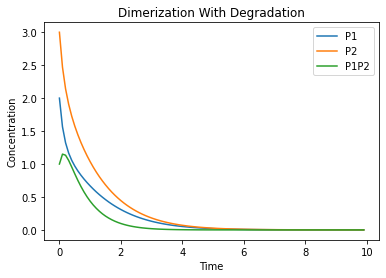

In [ ]:
plt.plot( sol3.t, sol3.y.T )
plt.xlabel( "Time" )
plt.ylabel( "Concentration" )
plt.legend( ["P1","P2","P1P2"] )
plt.title( "Dimerization With Degradation" );

<hr style="border:2px solid gray"> </hr>

(3) Describe the interesting features of the data. For example, is there a steady-state? If so, what is it and why did the system approach it? Are there any peaks? If so, why are they there?

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

There is a steady state in this process which starts at approximately t=5 where the concentration of all conmpounds reaches 0. This zero valued follows given that the relatively high degredation rates of 1 for all compounds (P1, P2, P1P2) and the fact that their is no production of P1 and P2 being introduced into the system. Moreover, the relatively low initial concentrations and lack of productive force for each of the base compounds (P1, P2) determine that the steady state is reached at the zero value rather than at some equilibrium of non-zero conecntration. Also, the does appear to be a peak in the dimer concentration early at around t = 0.1 s. This follows given that before the concentrations of P1 and P2 diminish signiciantly the reactive force for creating P1P2 will be relatively high. This is a drop off from this peak because both the products for making P1P2 and the compound itself are being degraded.

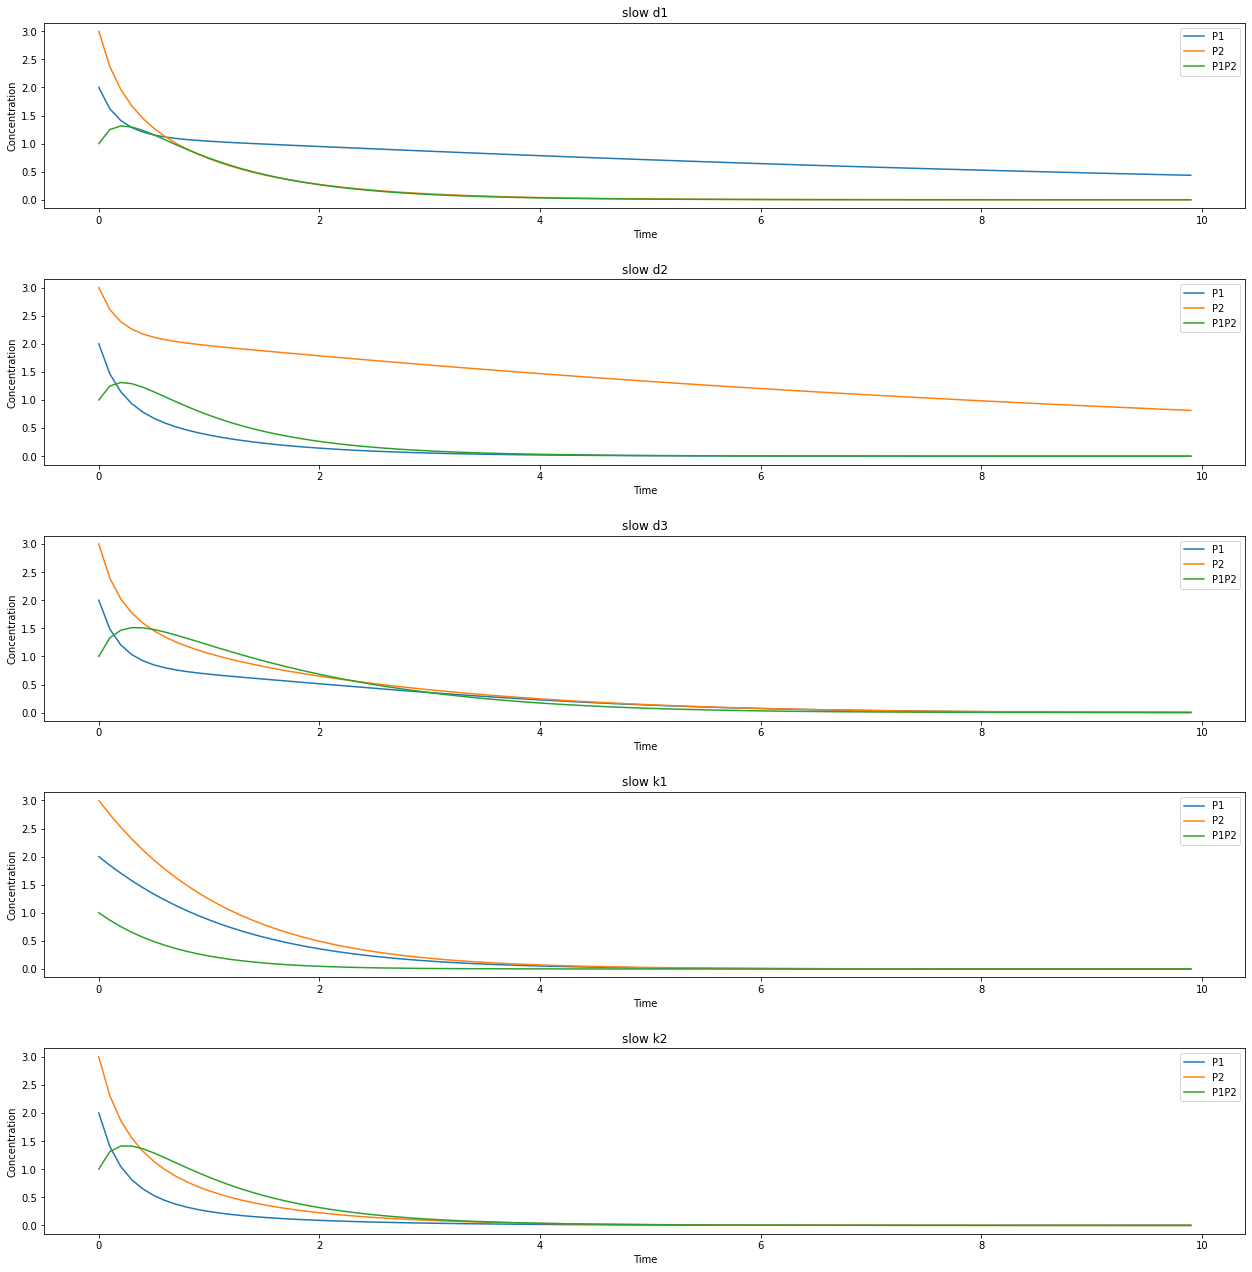

In [ ]:

# Expantion Work 
fig, ax = plt.subplots(5)
fig.set_size_inches(18.5, 18.5)
fig.tight_layout(pad=5.0)
# fig.set
for i in range(5):
  # constants 5
  d1 = 1
  d2 = 1
  d3 = 1
  k1 = 1
  k2 = 1
  params = [d1, d2, d3, k1, k2]
  #change one of the params 
  params[i] = .1

  P1 = 2
  P2 = 3
  P1P2 = 1 
  yinit = (P1, P2, P1P2)

  dm = lambda t,y: dimer_deg_model(t, y, params)
  sol4 = scipy.integrate.solve_ivp(fun = dm, t_span = (0,10), y0 = yinit, t_eval = np.arange(0,10,.1))
  #using the function defined above for finding equilibrium
  ax[i].plot( sol4.t, sol4.y.T )
  ax[i].set_xlabel( "Time")
  ax[i].set_ylabel( "Concentration" )
  ax[i].legend( ["P1", "P2", "P1P2"])
  var = ["d1", "d2","d3","k1","k2"]
  ax[i].set_title(f"slow {var[i]}")

plt.show() 

The above plots depict the varying effects of reducing the rates of degredation (d1 and d2) and also of production k1 and k2. Plots 1,2,3,5 all show a peak in the concentration of P1P2 which follows given that when the rate of production for the dimer is reduced to .1 in plot 4 a peak will never be reached given that the degradation of components will outpace the production of the dimer. Reducing the rates of degredation for d1,d2 (subplots 1 and 2) determine that there is no true steady state reached in the 10 second time space given that either P1 or P2 will continue to degrade.

<hr style="border:2px solid gray"> </hr>

(4) Find a set of parameter values (all $\ge10^{-12}$) for which the dimer's apparent steady-state concentration is higher than the steady-states of $P1$ and $P2$. What intuition did you use to find these values?

Note: By "apparent steady-state", I mean the value that $P1P2$ seems to remain at during the time-period of the simulation (i.e. its value from say 5s to 10s). Given that degradation is included in the model, the steady-state as time goes to infinity will always be zero for all three proteins.  But I am interested in the behavior on the timescale of seconds -- not years. 

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

In [91]:
# constants 
d1 = 1
d2 = 1
d3 = 0.01
k1 = 1
k2 = 0.01
params = (d1, d2, d3, k1, k2)

P1 = 2
P2 = 3
P1P2 = 1
yinit = (P1, P2, P1P2)

dm = lambda t,y: dimer_deg_model(t, y, params)
sol_dimer_equilibrium = scipy.integrate.solve_ivp(fun = dm, t_span = (0,10), y0 = yinit, t_eval = np.arange(0,10,.1))

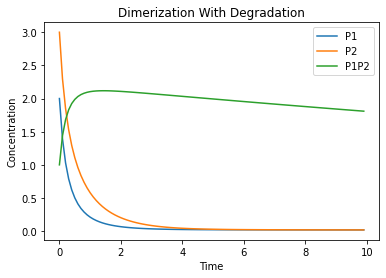

In [92]:
plt.plot( sol_dimer_equilibrium.t, sol_dimer_equilibrium.y.T )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1","P2","P1P2"])
plt.title( "Dimerization With Degradation");

In this set of parameters, $k1= 1nM^{-1}s^{-1}$, $k2=0.01 s^{-1}$ and $d1=d2=1 s^{-1}$ and $d3=0.01 s^{-1}$ , the dimer has an apparent higher steady state concentration. Because the parameters associated with the decay of P1P2 are smaller relatively than the rest of the parameters, P1 and P2 decay faster compared to it. Moreover, the initial concentration of P1P2 as well as the peak reached from the rate of production (k1) created a concentration that was relatively high so the effects of degredation did not bring this concentration to 0. 

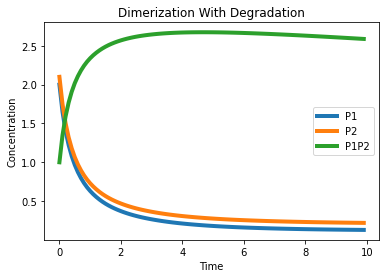

In [90]:
# Expantion Work 
# constants 
d1 = .01
d2 = .01
d3 = .01
k1 = 1
k2 = 0.01
params = (d1, d2, d3, k1, k2)

P1 = 2
P2 = 2.1
P1P2 = 1
yinit = (P1, P2, P1P2)

dm = lambda t,y: dimer_deg_model(t, y, params)
sol_dimer_equilibrium = scipy.integrate.solve_ivp(fun = dm, t_span = (0,10), y0 = yinit, t_eval = np.arange(0,10,.1))
plt.plot( sol_dimer_equilibrium.t, sol_dimer_equilibrium.y.T, linewidth = 4 )
plt.xlabel( "Time")
plt.ylabel( "Concentration" )
plt.legend( ["P1","P2","P1P2"])
plt.title( "Dimerization With Degradation");

This secondary example also depicts a set of conditions under which the "appearent steady state" of the dimer is higher than that of the component pieces. This is driven by the high k1 value. Even when P1,P2, and P1P2 degrade at the same rate the appearent staedy state of the dimer can be higher than that of the protiens P1 and P2 given a suffiecnt rate of production for the dimer. However, this effect would not be true given immensely large degredation rates for the components P1 and P2 because if they degrade too fast for the production rate to take affect then no P1P2 will be made. 

<hr style="border:2px solid gray"> </hr>

Acknowledgements

We worked collaboratively with eachother and also consulted CS341 class lecture notes and notebooks 